In [1]:
#from IPython.core.display import clear_output

#!pip3 install pandas-profiling==2.11
#clear_output()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#! cp /content/drive/MyDrive/semester7/Thesis/Models/* ./ -r
#! cp /content/drive/MyDrive/semester7/Thesis/Datasets/* ./ -r

In [3]:
#!gdown 1YHqgEFHoXa5vpSfKteAhBUWsJJ2RHgS7 -O data.csv

In [4]:
#!pip install --upgrade scipy

In [2]:
cd D:\Учеба\7 semester\Models_paper

D:\Учеба\7 semester\Models_paper


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
#from pandas_profiling import ProfileReport

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale

from Datasets.ProcessDataset import Dataset

#import torch
from sklearn.model_selection import train_test_split

from Models.Optimisers.GD import StochasticGradientDescent
from Models.Optimisers.Adam import Adam

from Models.Preconditioners.Preconditioners import SGD_preconditioner,Adam_preconditioner,OASIS_preconditioner

#from Models.LogisticRegression.LogisticRegression import Logistic_Regression
#from Models.LogisticRegression.LogisticRegression_layer import Logistic_Regression_train
from Models.LogisticRegression.LogisticRegression_numpy import Logistic_Regression_numpy
from Models.LogisticRegression.LogisticRegression_sklearn import Logistic_Regression_origin

from Models.FederatedLearning.Server import server
from Models.FederatedLearning.Worker import worker

from Models.MatrixScheduler.MatrixScheduler_identical import MatrixScheduler_identical
from Models.MatrixScheduler.MatrixScheduler_Uniform import MatrixScheduler_Uniform

from Models.StatisticClass import Statistic
from Models.StatisticClass import comparsion_array_loss,comparsion_array_weights,comparsion_array_acc

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression


from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [4]:
import random
random.seed(42)

# load Dataset

In [5]:
data = Dataset(dataset_name = 'Titanic')
X,y = data.X,data.y

In [6]:
cd D:\Учеба\7 semester\Models_paper\Reports\3Tuning

D:\Учеба\7 semester\Models_paper\Reports\3Tuning


# Classification Model

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#X_train,y_train,X_test,y_test = torch.tensor(X_train),torch.tensor(y_train),torch.tensor(X_test),torch.tensor(y_test)

# Logistic regression

In [8]:
LR_EPOCH = {"lr":1e-2,"epoch":1000}

## Model original

In [9]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [10]:
stat_origin = Statistic(X_test,y_test,"sklearn model")
log_regr = Logistic_Regression_origin(stat_collector=stat_origin,lr = LR_EPOCH['lr'],epoch = LR_EPOCH['epoch'])

log_regr.train(X_train,y_train)

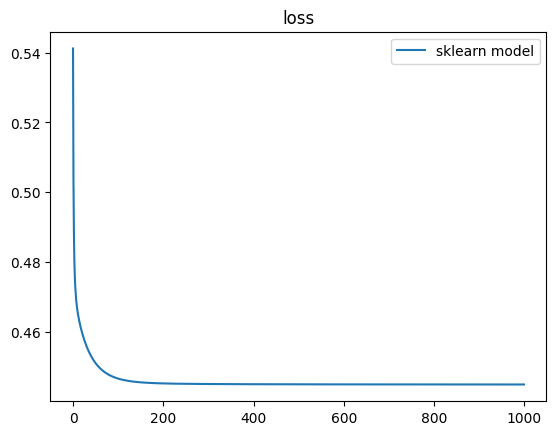

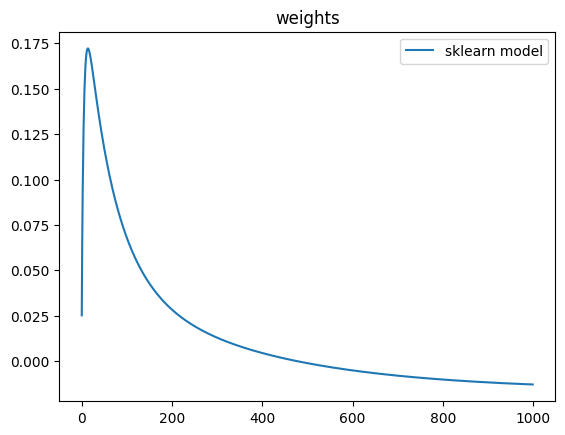

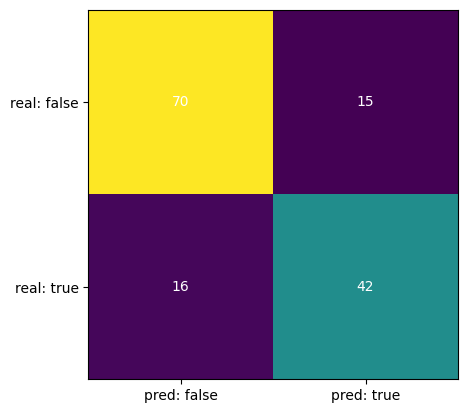

[[70 15]
 [16 42]]
balanced_accuracy_score: 0.7738336713995944
accuracy_score: 0.7832167832167832


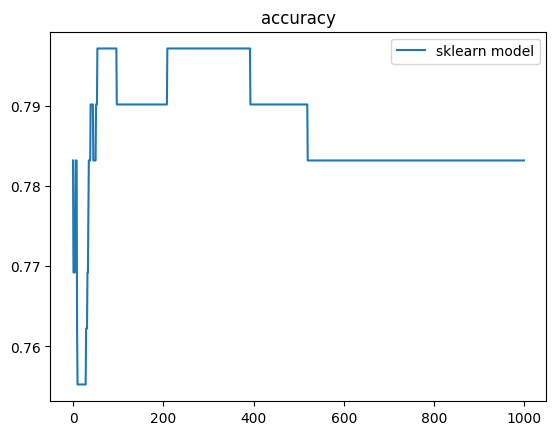

Train:
Min val: 0,Max val: 0.972009466014327,Mean: 0.42627142997467965            ,Var: 0.09586268850821532
Test:
Min val: 0.045062706537483815,Max val: 0.972009466014327,Mean: 0.42627142997467965            ,Var: 0.09586268850821532


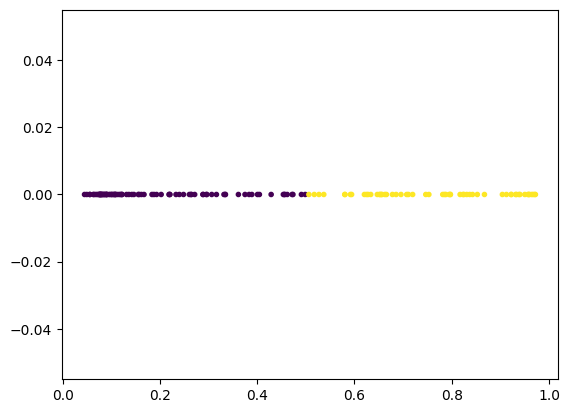

In [14]:
stat_origin.loss_plot()
stat_origin.weight_plot()
stat_origin.plot_confusion_matrix()
stat_origin.print_accuracy()
stat_origin.acc_plot()
stat_origin.show_y_distr()

## Model numpy

### SGD preconditioner

In [15]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [16]:
stat_np_sgd = Statistic(X_test,y_test,"numpy model")
opt = StochasticGradientDescent(lr = LR_EPOCH['lr'])
precond = SGD_preconditioner()

log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],optimizer = None,lr = LR_EPOCH['lr'],
                                       preconditioner = precond,epoch = LR_EPOCH['epoch'],
                                       stat_collector=stat_np_sgd)
log_regr_n.train(X_train,y_train)

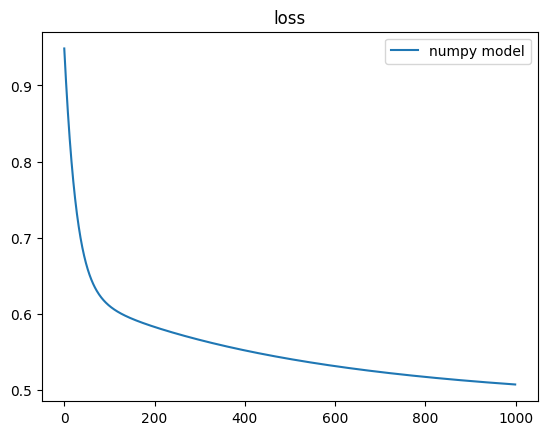

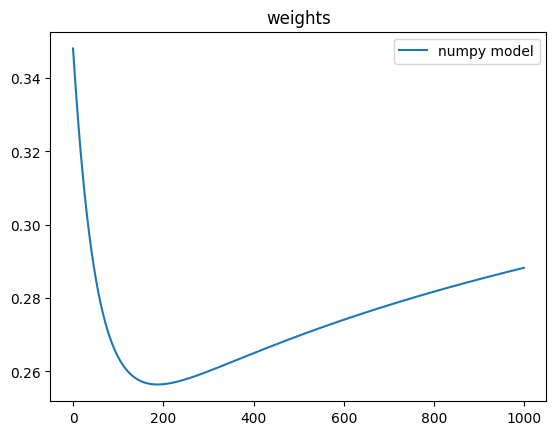

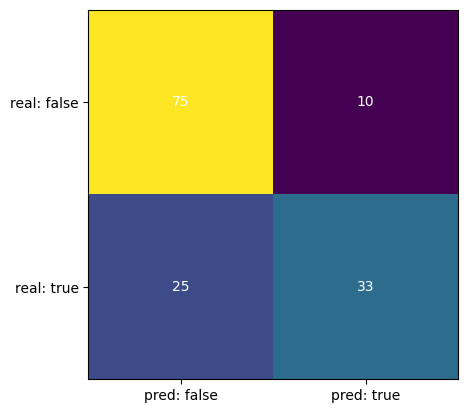

[[75 10]
 [25 33]]
balanced_accuracy_score: 0.725659229208925
accuracy_score: 0.7552447552447552


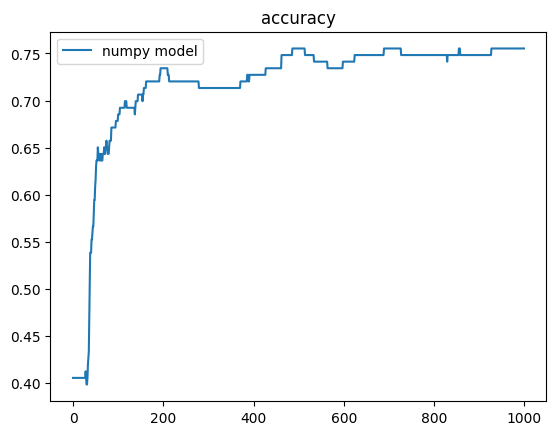

Train:
Min val: 0.0,Max val: 0.8531760761506986,Mean: 0.3973582396833722            ,Var: 0.041129667158822186
Test:
Min val: 0.16309412726364877,Max val: 0.8531760761506986,Mean: 0.3973582396833722            ,Var: 0.041129667158822186


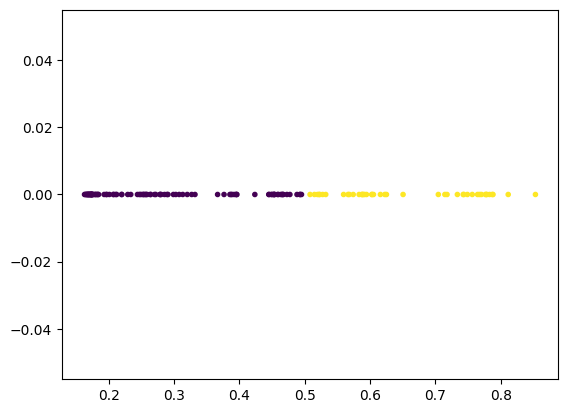

In [17]:
current_stat = stat_np_sgd
current_stat.loss_plot()
current_stat.weight_plot()
current_stat.plot_confusion_matrix()
current_stat.print_accuracy()
current_stat.acc_plot()
current_stat.show_y_distr()

### Adam

#### preconditioner test

In [18]:
precond = Adam_preconditioner(beta2 = 0.4)

In [19]:
derivative = np.array([1,4,1,4]).reshape((4,1))
second_derivative = np.full((11,1), 4).reshape((11,1))

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 0)
res,res_inv

(array([[ 1.,  0.,  0.,  0.],
        [ 0., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0., 16.]]),
 array([[1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.  , 0.25]]))

In [20]:
derivative = np.array([1,4,1,4]).reshape((4,1))
second_derivative = np.full((11,1), 4).reshape((11,1))

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 1)
res,res_inv 

(array([[ 1.,  0.,  0.,  0.],
        [ 0., 16.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0., 16.]]),
 array([[1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.  , 0.25]]))

In [21]:
derivative = np.array([5,3,1,4]).reshape((4,1))
second_derivative = np.full((11,1), 4).reshape((11,1))

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 2)
res,res_inv 

(array([[16.38461538,  0.        ,  0.        ,  0.        ],
        [ 0.        , 11.51282051,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , 16.        ]]),
 array([[0.2470483 , 0.        , 0.        , 0.        ],
        [0.        , 0.29471968, 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.25      ]]))

#### model

In [22]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [23]:
stat_np_adam = Statistic(X_test,y_test,"numpy model_adam")
precond = Adam_preconditioner(beta2 = 0.4)

#opt = Adam(lr = LR_EPOCH['lr'],beta1 = 0.2,beta2 = 0.7,n_features=X_train.shape[1]+1)

log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],optimizer = None,
                                       lr = LR_EPOCH['lr'], preconditioner = precond,
                                       epoch = LR_EPOCH['epoch'],stat_collector=stat_np_adam)
log_regr_n.train(X_train,y_train)

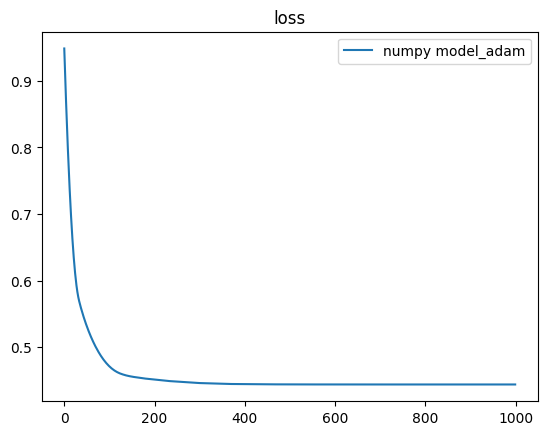

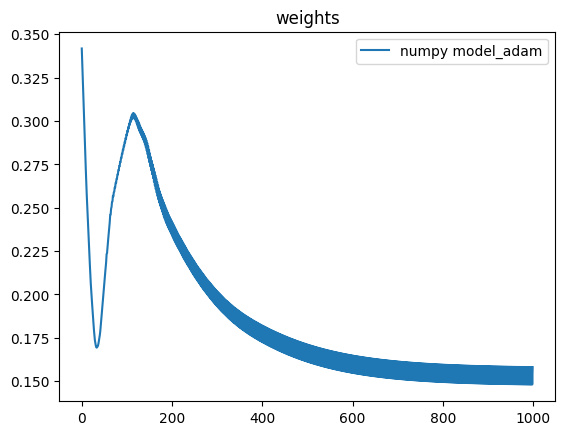

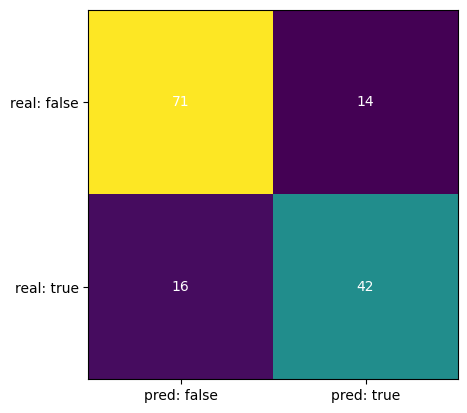

[[71 14]
 [16 42]]
balanced_accuracy_score: 0.7797160243407708
accuracy_score: 0.7902097902097902


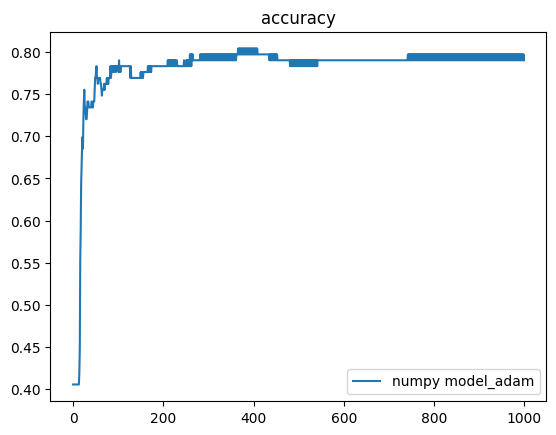

Train:
Min val: 0.0,Max val: 0.9712427810986748,Mean: 0.4164360215097714            ,Var: 0.09637070975531177
Test:
Min val: 0.04091174609777308,Max val: 0.9712427810986748,Mean: 0.4164360215097714            ,Var: 0.09637070975531177


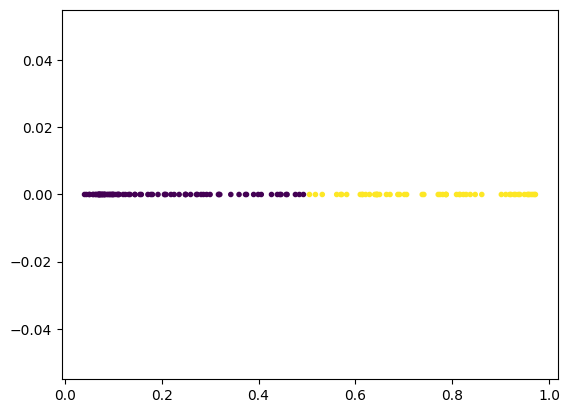

In [24]:
current_stat = stat_np_adam
current_stat.loss_plot()
current_stat.weight_plot()
current_stat.plot_confusion_matrix()
current_stat.print_accuracy()
current_stat.acc_plot()
current_stat.show_y_distr()

### OASIS

#### preconditioner test

In [25]:
precond = OASIS_preconditioner(beta2 = 0.4,alpha = 1)

In [26]:
derivative = np.array([1,4])
second_derivative = np.array([[1,2],[2,4]])

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 0)
res,res_inv

[-1 -1] (2,)


(array([[1.8, 0. ],
        [0. , 3.6]]),
 array([[0.55555556, 0.        ],
        [0.        , 0.27777778]]))

In [27]:
derivative = np.array([1,4])
second_derivative = np.array([[1,2],[2,4]])

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 1)
res,res_inv 

[1 1] (2,)


(array([[2.52, 0.  ],
        [0.  , 5.04]]),
 array([[0.3968254, 0.       ],
        [0.       , 0.1984127]]))

In [28]:
derivative = np.array([5,3])
second_derivative = np.array([[2,4],[4,3]])

res,res_inv = precond.get_next_value(derivative = derivative,
                       second_derivative = second_derivative,
                       iteration = 2)
res,res_inv 

[-1  1] (2,)


(array([[-0.192,  0.   ],
        [ 0.   ,  1.416]]),
 array([[1.        , 0.        ],
        [0.        , 0.70621469]]))

#### model

In [29]:
LR_EPOCH

{'lr': 0.01, 'epoch': 1000}

In [30]:
stat_np_oasis = Statistic(X_test,y_test,"numpy model_oasis")
precond = OASIS_preconditioner(beta2 = 0.2,alpha=1e-4)


log_regr_n = Logistic_Regression_numpy(n_features = X_train.shape[1],optimizer = None,
                                       lr = LR_EPOCH['lr'], preconditioner = precond,
                                       epoch = LR_EPOCH['epoch'],
                                       stat_collector=stat_np_oasis)
log_regr_n.train(X_train,y_train)

In [31]:
min(stat_np_oasis.matrix_frequent),min(stat_np_oasis.matrix_min),1e-4

(0.0026164567191225285, 9.54124156619333e-06, 0.0001)

In [32]:
#plt.bar(np.arange(0,1000),stat_np_oasis.matrix_frequent)

In [33]:
#plt.bar(np.arange(0,1000),stat_np_oasis.matrix_min)

In [34]:
"""
val = np.unique(stat_np_oasis.matrix_stat)
mask = val<100
val = val[mask]

mask = val!=0
val = val[val!=0]
plt.plot(val,np.zeros(val.shape),'.')
plt.title("OASIS matrix values")
print(val.shape)
"""

'\nval = np.unique(stat_np_oasis.matrix_stat)\nmask = val<100\nval = val[mask]\n\nmask = val!=0\nval = val[val!=0]\nplt.plot(val,np.zeros(val.shape),\'.\')\nplt.title("OASIS matrix values")\nprint(val.shape)\n'

In [35]:
"""
val,f = np.unique(stat_np_oasis.matrix_stat,return_counts=True)
mask = abs(val)<100
val = val[mask]
f = f[mask]

mask = val!=0
val = val[val!=0]
f = f[mask]

plt.plot(val,f,'.')
"""

"\nval,f = np.unique(stat_np_oasis.matrix_stat,return_counts=True)\nmask = abs(val)<100\nval = val[mask]\nf = f[mask]\n\nmask = val!=0\nval = val[val!=0]\nf = f[mask]\n\nplt.plot(val,f,'.')\n"

In [36]:
pd.DataFrame(abs(stat_np_oasis.matrix_stat)).describe()

,0
count,11001.000000
mean,0.187813
std,0.306138
min,0.000000
25%,0.019481
50%,0.061268
75%,0.215987
max,2.477957


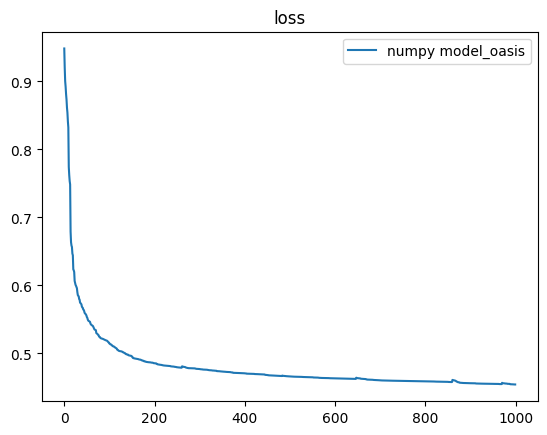

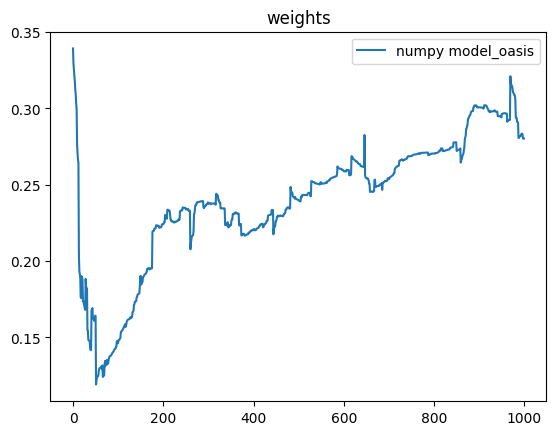

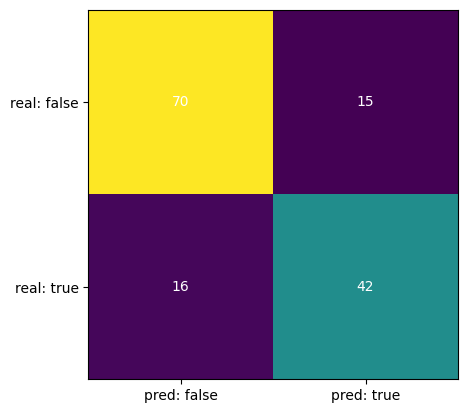

[[70 15]
 [16 42]]
balanced_accuracy_score: 0.7738336713995944
accuracy_score: 0.7832167832167832


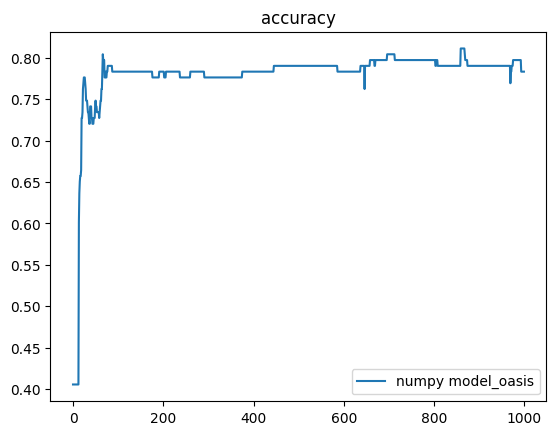

Train:
Min val: 0.0,Max val: 0.9690471826094931,Mean: 0.4194304080373566            ,Var: 0.09468132170989993
Test:
Min val: 0.06367043670452735,Max val: 0.9690471826094931,Mean: 0.4194304080373566            ,Var: 0.09468132170989993


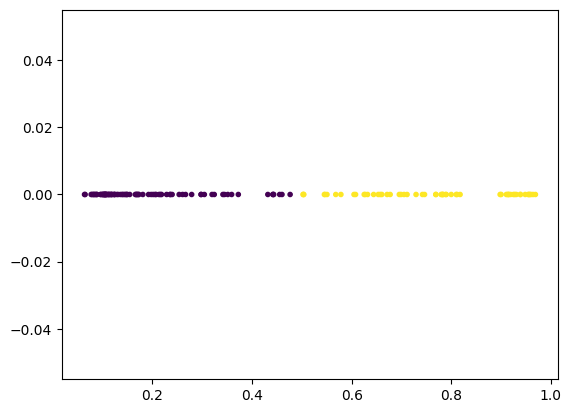

In [37]:
current_stat = stat_np_oasis
current_stat.loss_plot()
current_stat.weight_plot()
current_stat.plot_confusion_matrix()
current_stat.print_accuracy()
current_stat.acc_plot()
current_stat.show_y_distr()

## Comparison SGD/Adam

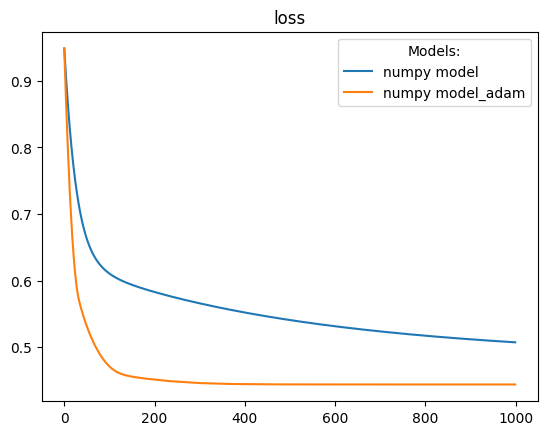

difference(numpy model,numpy model_adam) = numpy model - numpy model_adam


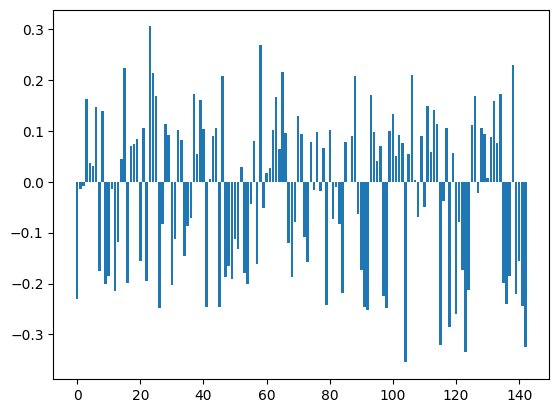

MSE(numpy model,numpy model_adam) = 0.012973288951955273


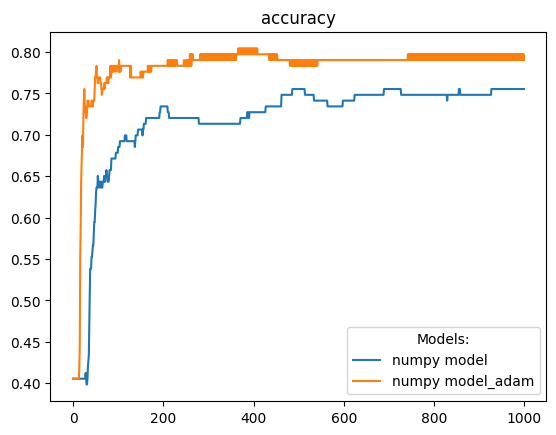

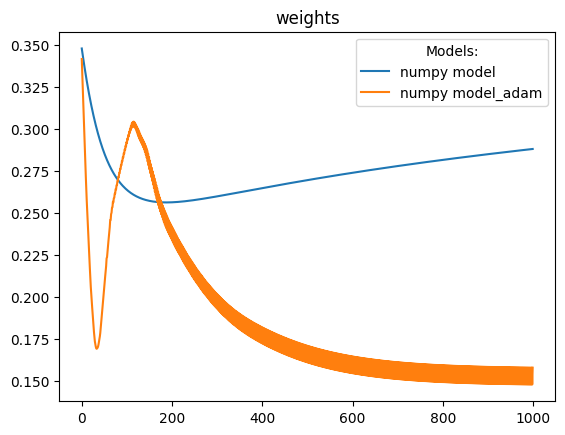

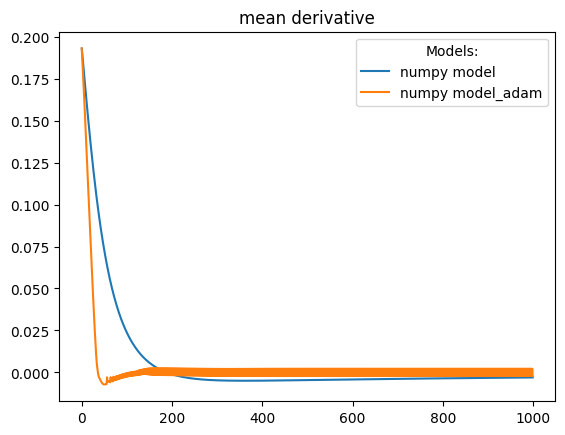

In [38]:
#stat_np,stat_origin
current_stat1 = stat_np_sgd
current_stat2 = stat_np_adam
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)

## Comparison SGD/OASIS

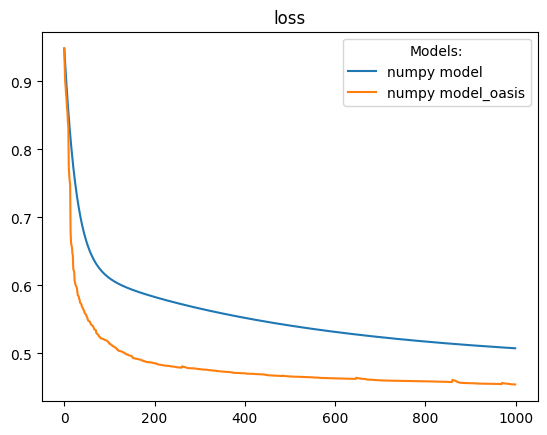

difference(numpy model,numpy model_oasis) = numpy model - numpy model_oasis


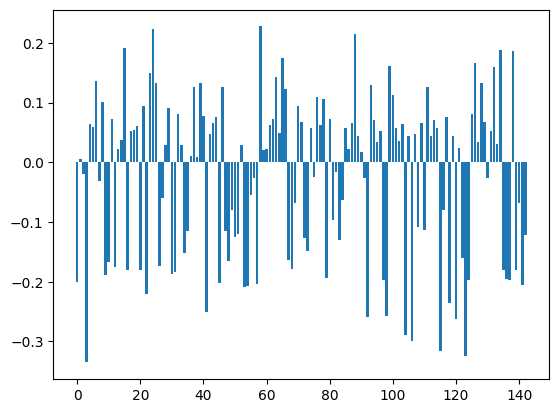

MSE(numpy model,numpy model_oasis) = 0.011584038487318473


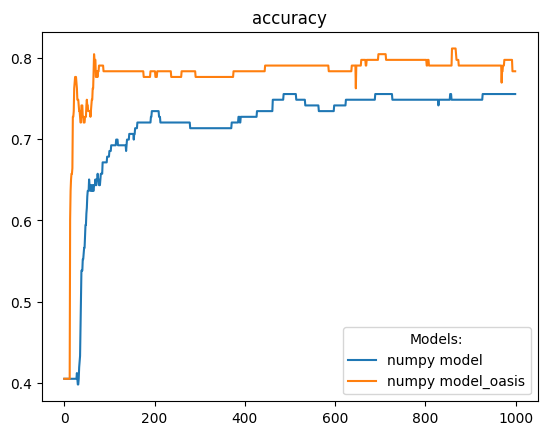

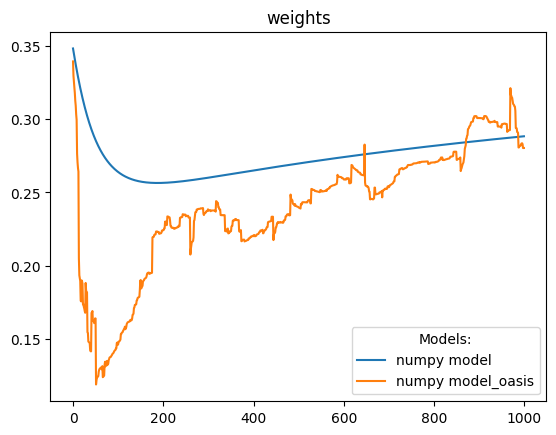

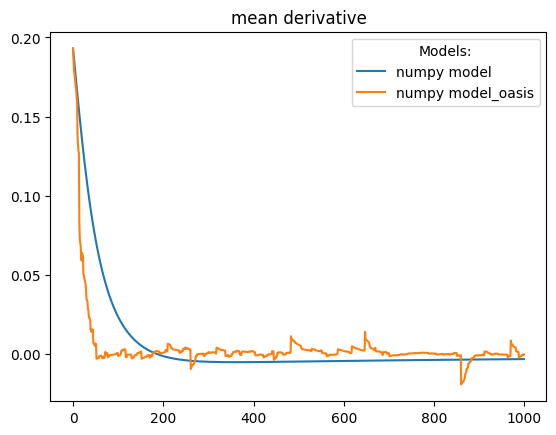

In [39]:
#stat_np,stat_origin
current_stat1 = stat_np_sgd
current_stat2 = stat_np_oasis
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)

## Comparison Adam/OASIS

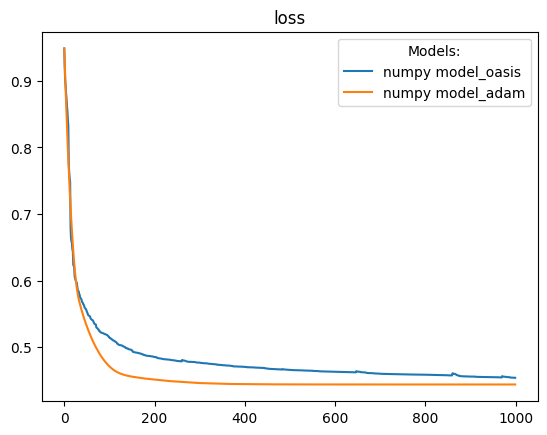

difference(numpy model_oasis,numpy model_adam) = numpy model_oasis - numpy model_adam


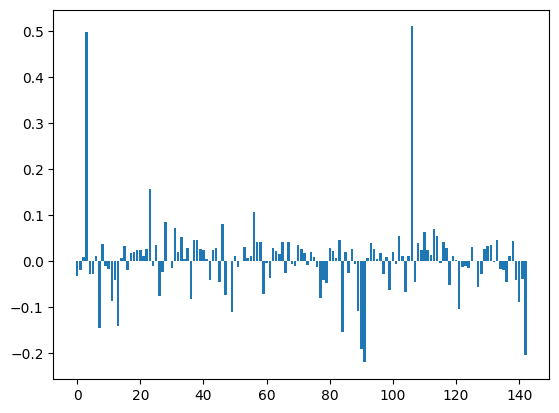

MSE(numpy model_oasis,numpy model_adam) = 0.006782277836894089


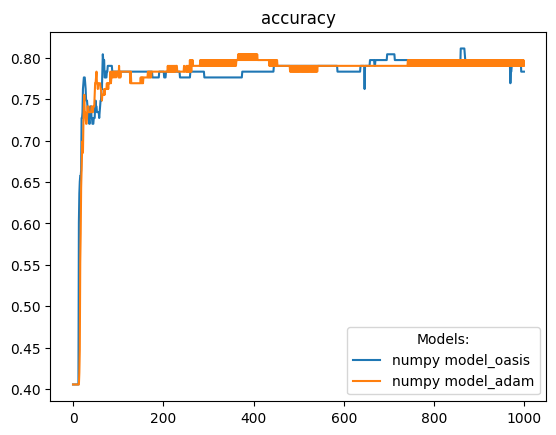

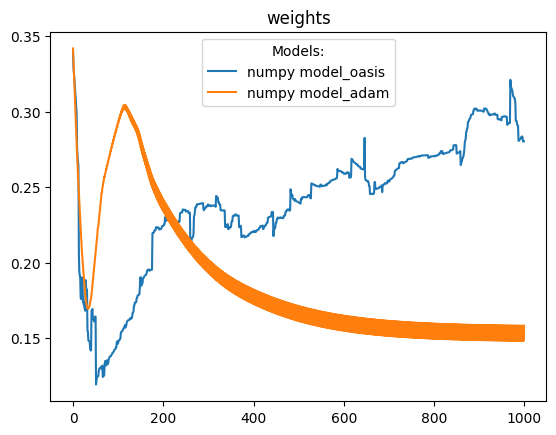

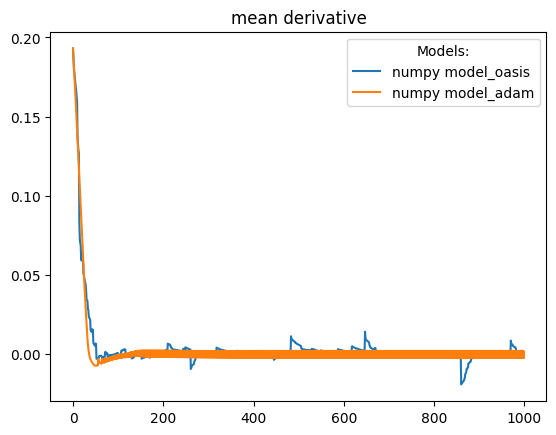

In [40]:
#stat_np,stat_origin
current_stat1 = stat_np_oasis
current_stat2 = stat_np_adam
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)

## Comparison with original

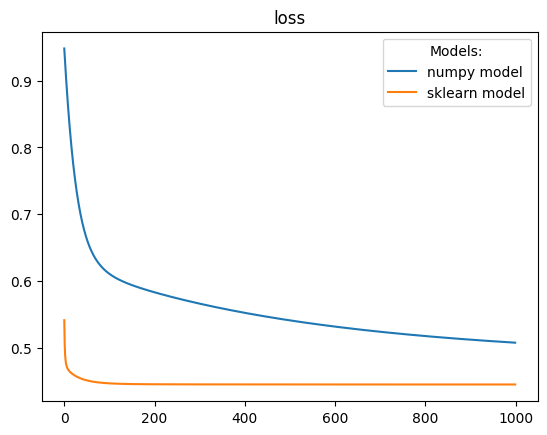

difference(numpy model,sklearn model) = numpy model - sklearn model


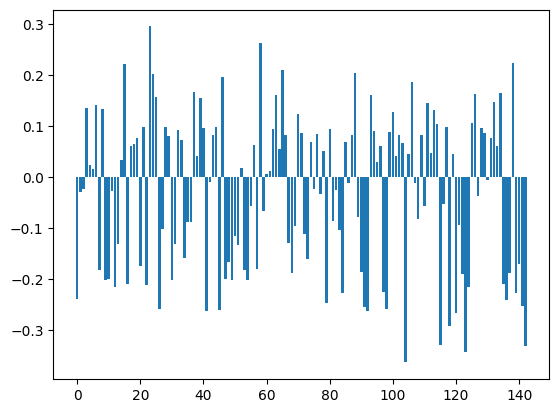

MSE(numpy model,sklearn model) = 0.37125237809320333


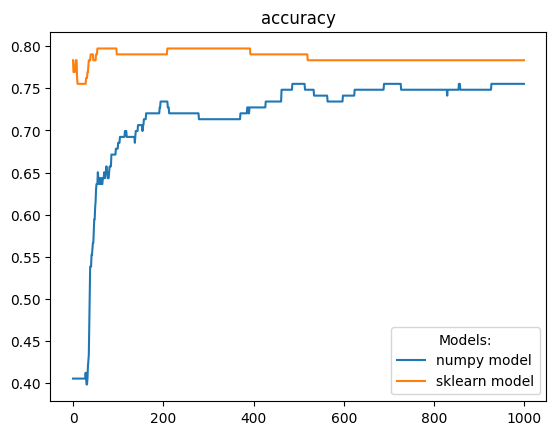

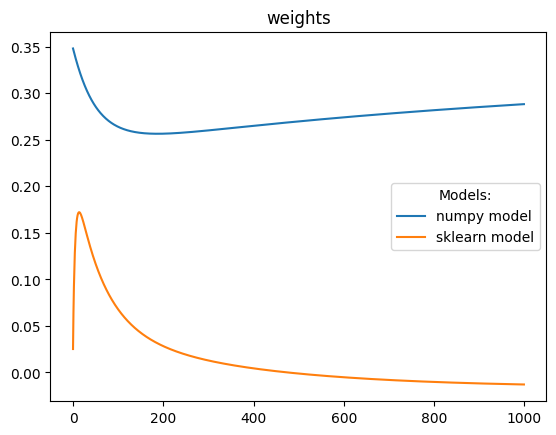

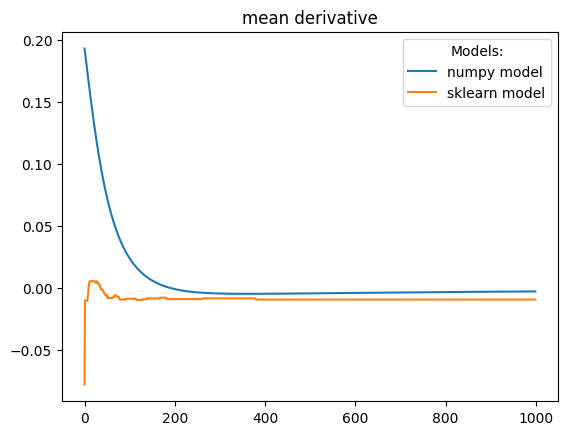

In [41]:
#stat_np,stat_origin
current_stat1 = stat_np_sgd
current_stat2 = stat_origin
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)

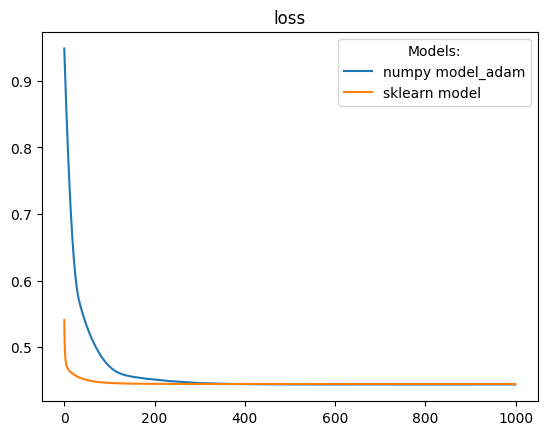

difference(numpy model_adam,sklearn model) = numpy model_adam - sklearn model


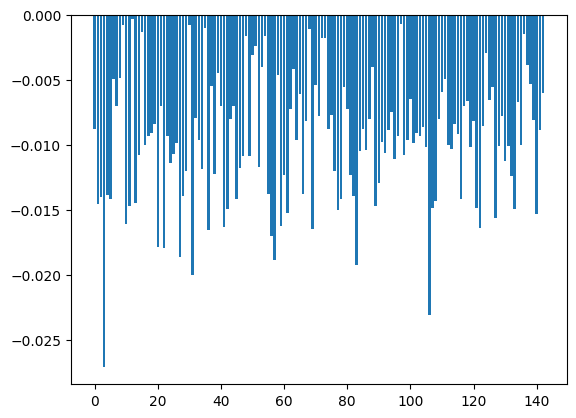

MSE(numpy model_adam,sklearn model) = 0.4385545958295257


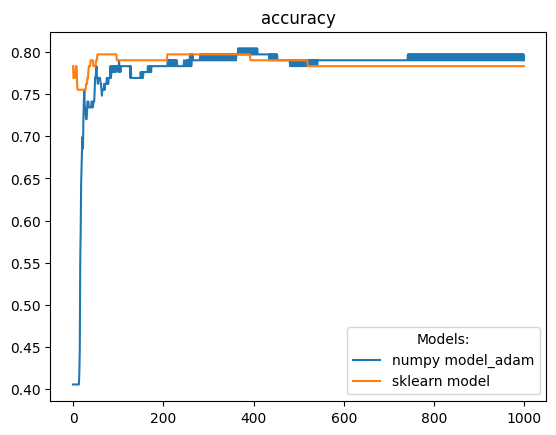

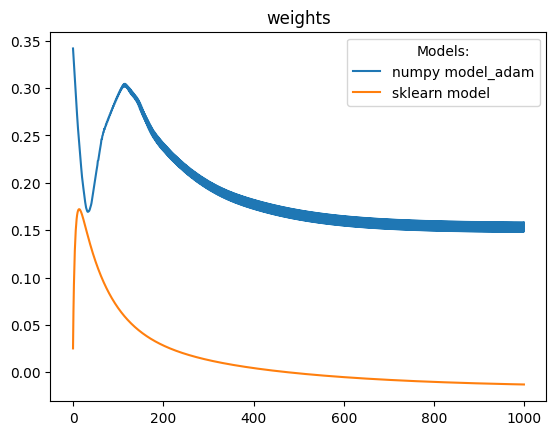

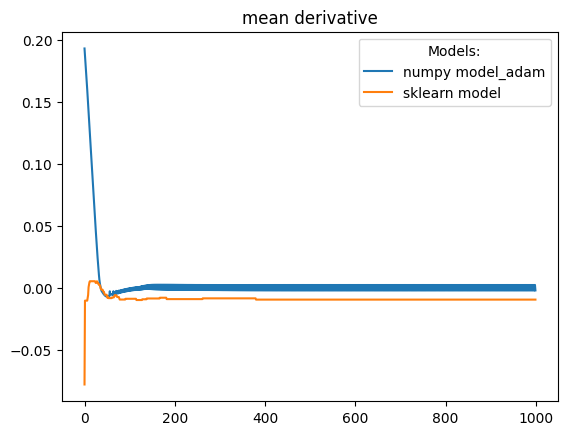

In [42]:
#stat_np,stat_origin
current_stat1 = stat_np_adam
current_stat2 = stat_origin
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)

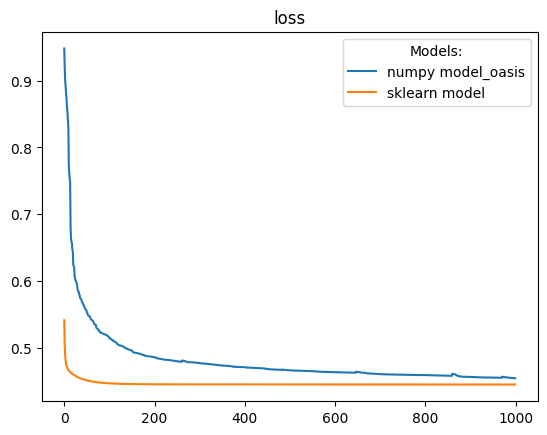

difference(numpy model_oasis,sklearn model) = numpy model_oasis - sklearn model


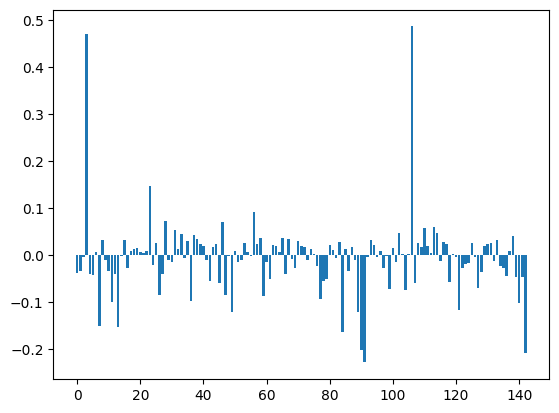

MSE(numpy model_oasis,sklearn model) = 0.4365670736545098


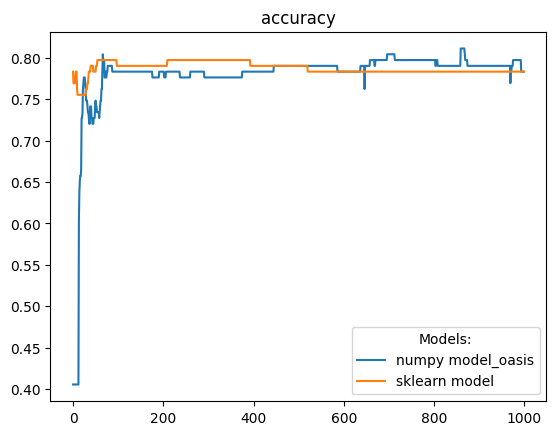

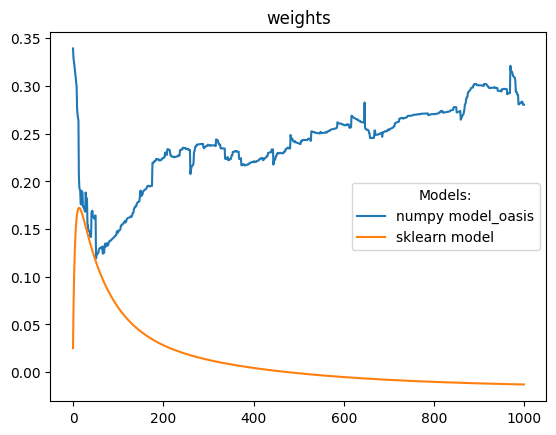

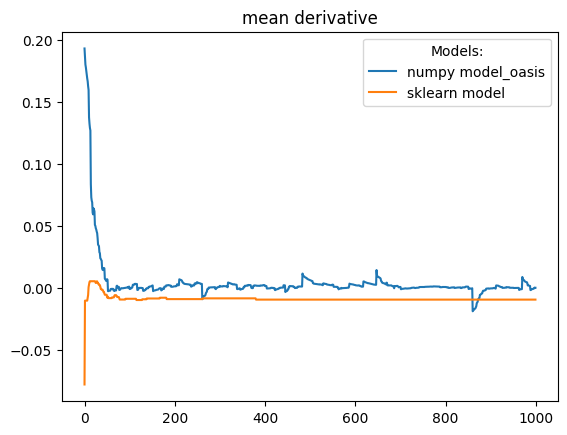

In [43]:
#stat_np,stat_origin
current_stat1 = stat_np_oasis
current_stat2 = stat_origin
current_stat1.comparison_loss_plot(current_stat2)
current_stat1.comparison_mse(current_stat2)
current_stat1.comparison_accuracy_plot(current_stat2)

current_stat1.comparison_weights_plot(current_stat2)
current_stat1.comparison_der_mean_plot(current_stat2)